In [1]:
import numpy as np

numPoints, numFeatures = 100, 5
X = np.random.randn(numPoints, numFeatures)

trueWeights = np.random.randn(numFeatures, 1)
y = X @ trueWeights + np.random.randn(numPoints, 1) * 0.5  # add noise

print("Original shape:", X.shape)

XMean = X.mean(axis=0)
XCentered = X - XMean

gramMatrix = XCentered @ XCentered.T  # (N, N)
print("Gram matrix shape:", gramMatrix.shape)

eigenValues, eigenVectors = np.linalg.eigh(gramMatrix)

sortedIndices = np.argsort(eigenValues)[::-1]
eigenValues = eigenValues[sortedIndices]
eigenVectors = eigenVectors[:, sortedIndices]

validComponents = eigenValues > 1e-10  # avoid division by zero
eigenValues = eigenValues[validComponents]
eigenVectors = eigenVectors[:, validComponents]

principalAxes = (XCentered.T @ eigenVectors) / np.sqrt(eigenValues)

numReducedFeatures = 2
projectionMatrix = principalAxes[:, :numReducedFeatures]
XReduced = XCentered @ projectionMatrix
print("Reduced shape:", XReduced.shape)

explainedVarianceRatio = eigenValues / np.sum(eigenValues)
varianceRetained = np.sum(explainedVarianceRatio[:numReducedFeatures])

print("Explained variance ratio:", explainedVarianceRatio)
print(f"Variance retained (first {numReducedFeatures} comps): {varianceRetained:.4f}")

Original shape: (100, 5)
Gram matrix shape: (100, 100)
Reduced shape: (100, 2)
Explained variance ratio: [0.2669801  0.23366759 0.18906241 0.18840483 0.12188506]
Variance retained (first 2 comps): 0.5006


Final MSE on original features: 0.2066
Final MSE on PCA-reduced features: 1.1779


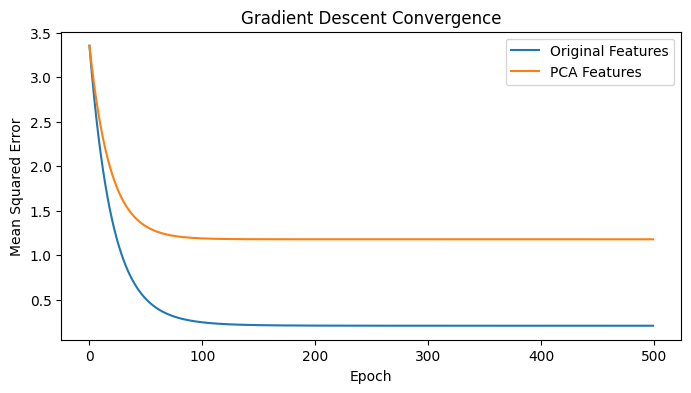

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ==== Synthetic target for testing ====
trueWeights = np.random.randn(numFeatures, 1)
y = X @ trueWeights + np.random.randn(numPoints, 1) * 0.5  # add noise

# ===== Function for gradient descent =====
def gradient_descent(X_input, y, learningRate=0.01, numEpochs=500):
    numPoints = X_input.shape[0]
    Xb = np.hstack([np.ones((numPoints, 1)), X_input])  # add bias
    weights = np.zeros((Xb.shape[1], 1))
    lossHistory = []
    
    for epoch in range(numEpochs):
        predictions = Xb @ weights
        error = predictions - y
        gradients = (2 / numPoints) * Xb.T @ error
        weights -= learningRate * gradients
        lossHistory.append(np.mean(error**2))
    
    return weights, lossHistory

# ===== Gradient descent on original features =====
weights_orig, loss_orig = gradient_descent(X, y)

# ===== Gradient descent on PCA-reduced features =====
weights_pca, loss_pca = gradient_descent(XReduced, y)

# ===== Compare final MSE =====
mse_orig = loss_orig[-1]
mse_pca = loss_pca[-1]
print(f"Final MSE on original features: {mse_orig:.4f}")
print(f"Final MSE on PCA-reduced features: {mse_pca:.4f}")

# ===== Plot convergence =====
plt.figure(figsize=(8,4))
plt.plot(loss_orig, label="Original Features")
plt.plot(loss_pca, label="PCA Features")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()